<a href="https://colab.research.google.com/github/romancgilbert/EDA_ML_1/blob/main/01_assignment_wrangling_and_eda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Q1:(1)
df = pd.read_csv("scratchpad/data/airbnb_NYC.csv", encoding="latin1")
#df.head()

#price colum was cleaned by removing commas and converting it to numeric values, with invalid entries set to NaN.
df["Price"] = df["Price"].astype(str).str.replace(",", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

#checks for missing values in price column/sums them up
df["Price"].isna().sum()

0

I changed price column to a str to ensure that str replacement methods would work correctly. Then used str.replace() to remove commas from the price values. After cleaning the values, I converted the column back to a numeric type using pd.to_numeric() with errors="coerce", which converts any values that cannot be parsed into numbers into NaN. After this process, there are 0 missing values in the price column.

In [ ]:
#Q1:(2)
df_cop = pd.read_csv("scratchpad/data/mn_police_use_of_force.csv", encoding="latin1")
#df_cop.head()

#replace Y w/Yes & N with No in subject_injury column
df_cop["subject_injury"] = df_cop["subject_injury"].replace({"Y":"Yes", "N":"No"})

#get proportion of values missing b4 chnges
prop_missing = df_cop["subject_injury"].isna().mean()
print(prop_missing)

0.7619342359767892


This proportion means that about 76.19% of the observations do not contain recorded injury information.

In [ ]:
#create new clmn to fill missing values with Missing instead of having NaN
df_cop["subject_injury_clean"] = df_cop["subject_injury"].fillna("Missing")
cross_tab = pd.crosstab(df_cop["force_type"], df_cop["subject_injury_clean"])
cross_tab

subject_injury_clean,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


In [ ]:
#Q1:(3)
df_meta = pd.read_csv("scratchpad/data/metabric.csv", encoding="latin1")
#df_meta.head()

#map overall survival status to numerical dummy values, 0 for deceased and 1 for living
df_meta["Survival_Dummy"] = df_meta["Overall Survival Status"].map({
    "0:LIVING": 1,
    "1:DECEASED": 0
})

#check if mapping was successful
df_meta[["Overall Survival Status", "Survival_Dummy"]].head()

,Overall Survival Status,Survival_Dummy
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0


In [ ]:
#load airbnb_NYC df again and check for nan in review scores rating column
df = pd.read_csv("scratchpad/data/airbnb_NYC.csv", encoding="latin1")
df["Review Scores Rating"].isna().sum()

8323

There are 8323 nan values in review scores rating clmn.

In [ ]:
#calculating the median of the Review Scores Rating column, ignoring NaN values
median_rating = df["Review Scores Rating"].median()
median_rating

94.0

Median of the review scores rating column is 94.0.

In [ ]:
#creating a new column where missing values in Review Scores Rating are imputed with the median value
df["Review Scores Rating Imputed"] = df["Review Scores Rating"].fillna(median_rating)

In [ ]:
#checking for missing values in the new imputed column, it should be 0
df["Review Scores Rating Imputed"].isna().sum()

0

Imputing nan values with the median can distort the data by creating an artificial spike at the median, which may misrepresent the true distribution and lead to misleading results.

In [ ]:
# Count missing
miss_ct = air["Review Scores Rating"].isna().sum()
print(miss_ct)

NameError: name 'air' is not defined

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
pip install xlrd>=1.0.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Q2:(1)
df = pd.read_excel("scratchpad/data/GSAF5.xls")
#df.head()

We needed to load the dataset using pd.read_excel() instead of pd.read_csv() because the file is in Excel format.

In [ ]:
df_columns = df.columns.astype(str).str.strip()
df_cleaned = df.dropna(axis=1, how="all")
#df_cleaned.head()

An observation represents one shark attack incident recorded in a single row. Each observation is analyzed as a complete case, so removing rows with missing values would eliminate entire incidents and could bias the results.

In [ ]:
# clean the yr column by converting it to numeric values, coercing errors to nan, and then dropping rows with nan values
df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"], errors="coerce")
df_cleaned = df_cleaned.dropna(subset=["Year"])
df_cleaned["Year"] = df_cleaned["Year"].astype(int)

In [ ]:
# describe range of values in year clmn
print("Year range:", df_cleaned["Year"].min(), "to", df_cleaned["Year"].max())

Year range: 0 to 2026


In [ ]:
# filter rows since 1940
attacks_1940 = df_cleaned[df_cleaned["Year"] >= 1940]

In [ ]:
# count attacks per year since 1940
attacks_per_year = attacks_1940["Year"].value_counts().sort_index()

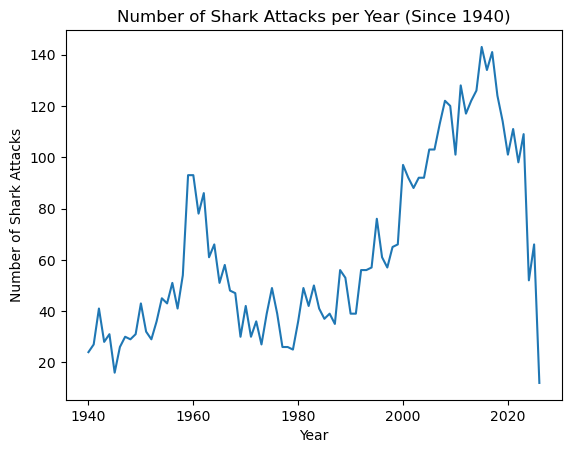

In [ ]:
# plot attacks over time
attacks_per_year.plot()

plt.title("Number of Shark Attacks per Year (Since 1940)")
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")

plt.show()

Overall, the attacks increase over time, but there is a steep decline in shark attacks beginning 2015.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?